# Linear Regression 

Machine Learning Course Autumn semester  
By Dr. Mahdi Eftekhari Python Homework #3  
Hiva Abolhadizadeh 400405004 

## Part A: Linear Regression with One Variable

### Load and Visualize Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load dataset
data = pd.read_csv('HW2_Dataset/dataset1.csv') 
x = data.iloc[:, 0].values  
y = data.iloc[:, 1].values

In [3]:
data.head(5)

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Confirm the data is loaded correctly
print(f"x: {x[:5]}")  
print(f"y: {y[:5]}")

x: [6.1101 5.5277 8.5186 7.0032 5.8598]
y: [17.592   9.1302 13.662  11.854   6.8233]


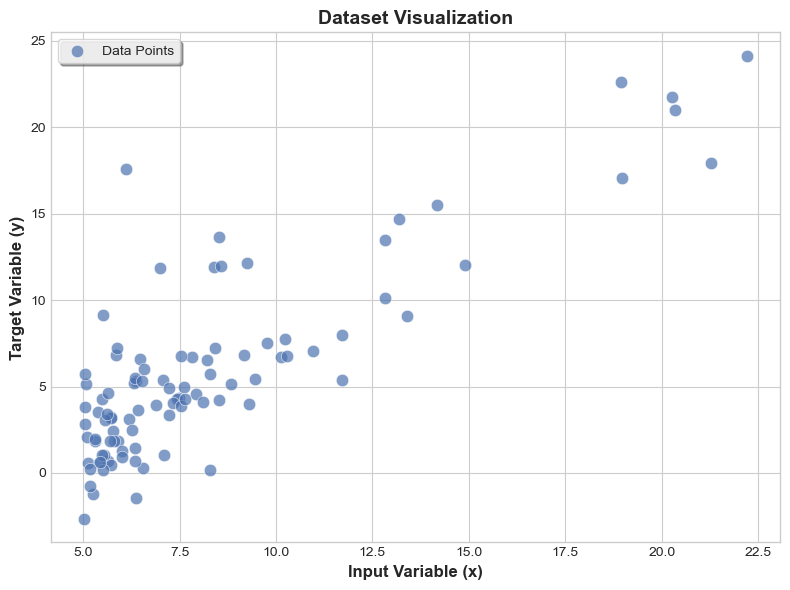

In [28]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(x, y, s=80, alpha=0.7, edgecolors='white', linewidths=0.5, color='#4C72B0', label='Data Points')
plt.xlabel('Input Variable (x)', fontsize=12, fontweight='bold')
plt.ylabel('Target Variable (y)', fontsize=12, fontweight='bold')
plt.title('Dataset Visualization', fontsize=14, fontweight='bold')

plt.legend(loc='upper left', frameon=True, framealpha=0.8, shadow=True, fontsize=10)
plt.tight_layout()

plt.show()

### 1. What is the cost function J(θ) equation for linear regression? 

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Cost Function for Linear Regression</title>
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
</head>
<body>
    <p>The cost function \( J(\theta) \) for linear regression is defined as:</p>
    <div class="equation">
        \[
        J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x_i) - y_i \right)^2
        \]
    </div>
    <p>Where:</p>
    <ul>
        <li>\( m \): Number of training examples.</li>
        <li>\( h_\theta(x) \): Hypothesis (prediction) \( \theta_0 + \theta_1x \).</li>
        <li>\( y_i \): Actual output for the \( i^{th} \) training example.</li>
    </ul>
    <p>This represents the Mean Squared Error (MSE).</p>
</body>
</html>


In [92]:
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = np.dot(X, theta)  # Hypothesis hθ(X) = Xθ
    errors = predictions - y  # Errors (hθ(X) - y)
    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # J(θ) = (1/2m) Σ (errors)^2
    return cost

### 2. Fit a Linear Regression Model

#### a. Closed-form solution calculated by MSE method 

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Closed-Form Solution for Linear Regression</title>
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        .equation {
            margin: 20px 0;
            font-size: 1.2em;
        }
    </style>
</head>
<body>
    <p>The closed-form solution directly computes \( \theta \) using the formula:</p>
    <div class="equation">
        \[
        \theta = (X^T X)^{-1} X^T y
        \]
    </div>
    <p>Where:</p>
    <ul>
        <li>\( X \): Design matrix (includes a column of ones for \( \theta_0 \)).</li>
        <li>\( X^T \): Transpose of the design matrix.</li>
        <li>\( y \): Output vector.</li>
    </ul>
    <p>This formula minimizes the Mean Squared Error (MSE) by finding the optimal parameters \( \theta \).</p>
</body>
</html>


In [283]:
def closed_form_solution(x, y):
    m = len(y)
    X = x
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [19]:
theta_closed_form = closed_form_solution(x, y)
print(f"Closed-form solution θ: {theta_closed_form}")

Closed-form solution θ: [-3.89578088  1.19303364]


#### b. Stochastic Gradient Descent

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>SGD Update Formula</title>
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            line-height: 1.6;
        }
        .equation {
            margin: 20px 0;
            font-size: 1.2em;
        }
    </style>
</head>
<body>
    <p>In Stochastic Gradient Descent, the parameter \( \theta_j \) is updated for each training example as follows:</p>
    <div class="equation">
        \[
        \theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
        \]
    </div>
    <p>Where:</p>
    <ul>
        <li>\( \theta_j \): Current parameter value for feature \( j \).</li>
        <li>\( \alpha \): Learning rate, which controls the step size of updates.</li>
        <li>\( \frac{\partial J(\theta)}{\partial \theta_j} \): Gradient of the cost function \( J(\theta) \) with respect to \( \theta_j \).</li>
    </ul>
    <p>This update is performed iteratively for each training sample during each epoch.</p>
</body>
</html>


In [20]:
def stochastic_gradient_descent(x, y, alpha, epochs):
    m = len(y)
    theta = np.zeros(2)  # Initialize θ0 and θ1
    for epoch in range(epochs):
        for i in range(m):
            xi = x[i]
            yi = y[i]
            error = (theta[0] + theta[1] * xi) - yi
            theta[0] -= alpha * error
            theta[1] -= alpha * error * xi
    return theta

In [21]:
theta_sgd = stochastic_gradient_descent(x, y, alpha=0.01, epochs=1500)
print(f"Stochastic GD θ: {theta_sgd}")

Stochastic GD θ: [-3.84815292  1.05705257]


#### c. Batch Gradient Descent

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Batch Gradient Descent Update Rule</title>
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        .equation {
            margin: 20px 0;
            font-size: 1.2em;
        }
    </style>
</head>
<body>
    <p>The parameter \( \theta_j \) is updated in batch gradient descent as:</p>
    <div class="equation">
        \[
        \theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x_i) - y_i \right) x_i
        \]
    </div>
    <p>Where:</p>
    <ul>
        <li>\( \theta_j \): Current parameter for feature \( j \).</li>
        <li>\( \alpha \): Learning rate (step size).</li>
        <li>\( m \): Number of training examples.</li>
        <li>\( h_\theta(x_i) \): Predicted value for the \( i \)-th training example.</li>
        <li>\( y_i \): Actual target value for the \( i \)-th training example.</li>
        <li>\( x_i \): Input value for the \( i \)-th training example.</li>
    </ul>
    <p>In batch gradient descent, the parameters are updated after processing all training examples in a single batch.</p>
</body>
</html>


In [22]:
def batch_gradient_descent(x, y, alpha, epochs):
    m = len(y)
    theta = np.zeros(2)  # Initialize θ0 and θ1
    for epoch in range(epochs):
        predictions = theta[0] + theta[1] * x
        error = predictions - y
        theta[0] -= alpha * (1 / m) * np.sum(error)
        theta[1] -= alpha * (1 / m) * np.sum(error * x)
    return theta

In [23]:
theta_bgd = batch_gradient_descent(x, y, alpha=0.01, epochs=1500)
print(f"Batch GD θ: {theta_bgd}")

Batch GD θ: [-3.63029144  1.16636235]


### 3. Plot the dataset and superimpose the fitted models using the three above methods. 

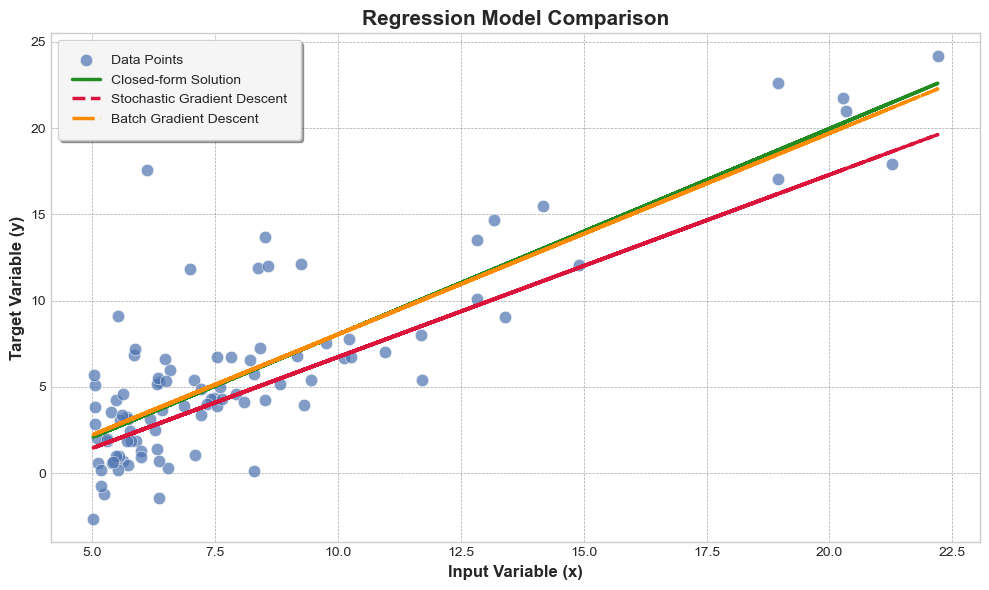

In [29]:
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(x, y, s=80, alpha=0.7, edgecolors='white', linewidths=0.5, color='#4C72B0', label='Data Points')

# Model fit lines with improved styling
plt.plot(x, theta_closed_form[0] + theta_closed_form[1] * x, color='forestgreen', linewidth=2.5, linestyle='-', label='Closed-form Solution')
plt.plot(x, theta_sgd[0] + theta_sgd[1] * x, color='crimson', linewidth=2.5, linestyle='--', label='Stochastic Gradient Descent')
plt.plot(x, theta_bgd[0] + theta_bgd[1] * x, color='darkorange', linewidth=2.5, linestyle='-.', label='Batch Gradient Descent')

# Enhanced labels and title
plt.xlabel('Input Variable (x)', fontsize=12, fontweight='bold')
plt.ylabel('Target Variable (y)', fontsize=12, fontweight='bold')
plt.title('Regression Model Comparison', fontsize=15, fontweight='bold')


plt.legend(loc='best', frameon=True, framealpha=0.9, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Use each estimated parameter θ (for each method) to predict the output for x=6.2, 12.8, 22.1, 30. 

In [30]:
x_test = [6.2, 12.8, 22.1, 30]
for method, theta in zip(['Closed-form', 'Stochastic GD', 'Batch GD'], 
                         [theta_closed_form, theta_sgd, theta_bgd]):
    predictions = [theta[0] + theta[1] * xi for xi in x_test]
    print(f"{method} Predictions: {predictions}")

Closed-form Predictions: [3.5010277156636165, 11.375049767314948, 22.470262658278187, 31.895228447375988]
Stochastic GD Predictions: [2.705572986605128, 9.682119917177353, 19.51270877389276, 27.863424039274665]
Batch GD Predictions: [3.601155132676249, 11.29914664489109, 22.146316503012002, 31.3605790706631]


### 5. Compare the parameter θ estimated by each method by plotting them in one figure. 

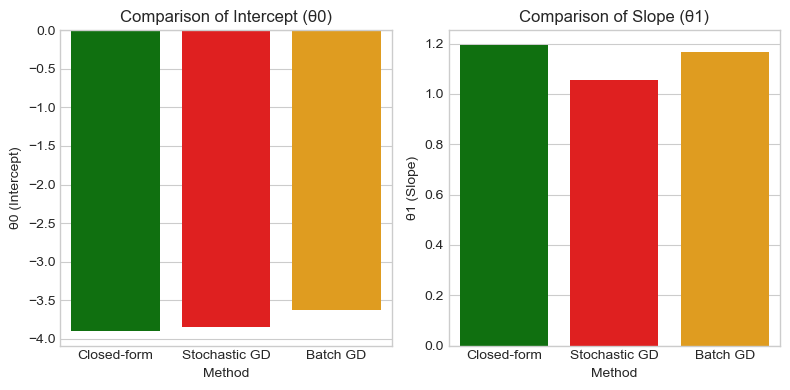

In [34]:
plt.figure(figsize=(8, 4), dpi=100)
plt.style.use('seaborn-v0_8-whitegrid')

methods = ['Closed-form', 'Stochastic GD', 'Batch GD']
theta0_vals = [theta[0] for theta in [theta_closed_form, theta_sgd, theta_bgd]]
theta1_vals = [theta[1] for theta in [theta_closed_form, theta_sgd, theta_bgd]]

# Plot theta0 (intercept) values
plt.subplot(1, 2, 1)
sns.barplot(x=methods, y=theta0_vals, palette=['green', 'red', 'orange'])
plt.xlabel('Method')
plt.ylabel('θ0 (Intercept)')
plt.title('Comparison of Intercept (θ0)')

# Plot theta1 (slope) values 
plt.subplot(1, 2, 2)
sns.barplot(x=methods, y=theta1_vals, palette=['green', 'red', 'orange'])
plt.xlabel('Method')
plt.ylabel('θ1 (Slope)')
plt.title('Comparison of Slope (θ1)')

plt.tight_layout()
plt.show()

### 6. Plot Cost Function 𝐽(𝜃) Along Epochs

In [53]:
def plot_cost_epochs(x, y, alpha, epochs):
    m = len(y)
    X = np.column_stack((np.ones(m), x))
    
    # Stochastic Gradient Descent (SGD)
    theta_sgd = np.zeros(2)
    cost_history_sgd = []
    for epoch in range(epochs):
        for i in range(m):
            xi = X[i]
            yi = y[i]
            error = np.dot(xi, theta_sgd) - yi
            theta_sgd[0] -= alpha * error
            theta_sgd[1] -= alpha * error * xi[1]
        cost_history_sgd.append(compute_cost(X, y, theta_sgd))
    
    # Batch Gradient Descent (BGD)
    theta_bgd = np.zeros(2)
    cost_history_bgd = []
    for epoch in range(epochs):
        predictions = np.dot(X, theta_bgd)
        error = predictions - y
        theta_bgd[0] -= alpha * (1 / m) * np.sum(error)
        theta_bgd[1] -= alpha * (1 / m) * np.sum(error * X[:, 1])
        cost_history_bgd.append(compute_cost(X, y, theta_bgd))
    
    # Plotting
    plt.figure(figsize=(10, 6), dpi=100)
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.plot(cost_history_sgd, label='Stochastic GD', color='#e74c3c', linewidth=2, alpha=0.7)
    plt.plot(cost_history_bgd, label='Batch GD', color='#f39c12', linewidth=2)
    plt.xlabel('Epochs', fontsize=12, fontweight='bold')
    plt.ylabel('Cost J(θ)', fontsize=12, fontweight='bold')
    plt.title('Cost Function Comparison: SGD vs BGD', fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', frameon=True, framealpha=0.8, shadow=True)
    plt.tight_layout()
    plt.show()

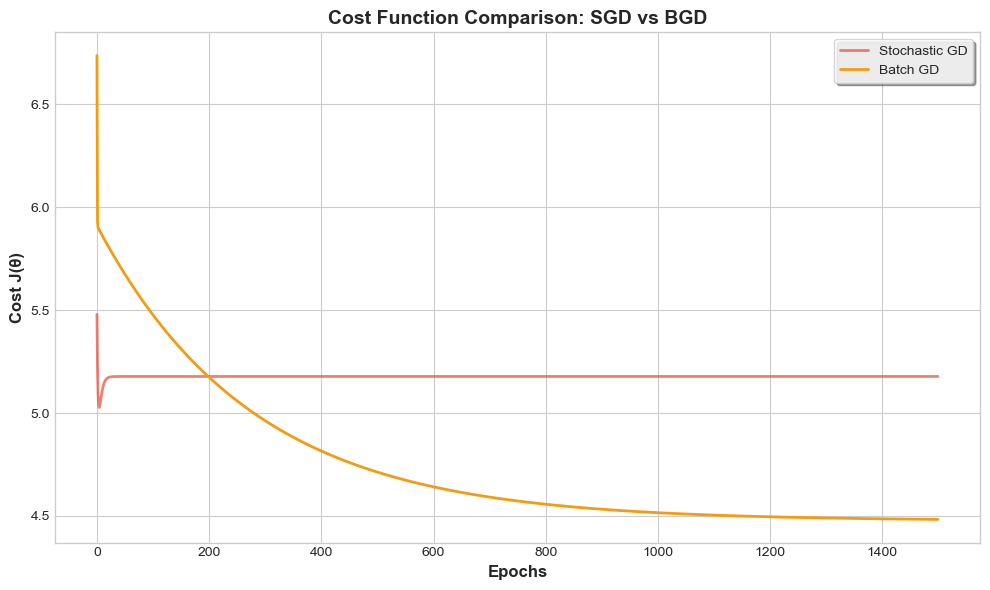

In [54]:
plot_cost_epochs(x, y, alpha=0.01, epochs=1500)

### 7. Which type of G.D. (online\batch) do you prefer here? Why? 

Base on the graph comparing SGD (Stochastic Gradient Descent) and BGD (Batch Gradient Descent), in this specific case BGD (orange line) is preferred for the following reasons:

1. Better Final Performance: BGD reaches a lower final cost value (around 4.5), while SGD converges at a higher value (around 5.2).

2. More Stable Convergence: Although BGD starts slower, its cost reduction pattern is much smoother and more stable. In contrast, SGD shows significant fluctuations at the beginning of training.

3. Greater Certainty: The BGD curve is more predictable and gradually approaches the optimal point, while SGD exhibits more volatile behavior.

However, it's important to note that this preference is specific to this particular dataset. In other cases, especially with larger datasets, SGD might perform better. This is because SGD is generally more memory-efficient and can handle large-scale problems better, despite its noisy optimization path.

In [110]:
def compute_MSE(y, y_hat):
    m = len(y)  # Number of training examples
    errors = y_hat - y  # Errors (hθ(X) - y)
    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # J(θ) = (1/2m) Σ (errors)^2
    return cost

## B. Multiple variable Regression 

### Q: Why is OHE better at encoding regional features compared to integer encoding? 

One-hot encoding (OHE) is better for categorical features like "region" because it avoids imposing an ordinal relationship between categories. Integer encoding assumes a ranking (e.g., 0 < 1 < 2), which can mislead the model into interpreting these values as having numerical significance, leading to incorrect predictions. OHE treats each category as independent, preserving the categorical nature of the data.

### 1. Calculate w by closed-form solution calculated by MSE method. 

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Load dataset

In [195]:
train_data = pd.read_csv('HW2_Dataset/train.csv')
test_data = pd.read_csv('HW2_Dataset/test.csv')

In [196]:
train_data.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [197]:
test_data.head(3)

,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.7661
1,24,male,32.70,0,yes,southwest,34472.8410
2,24,male,25.80,0,no,southwest,1972.9500


In [198]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   gender    1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


#### Preprocessing

In [199]:
# Integer encoding for 'sex' and 'smoker'
train_data['gender'] = train_data['gender'].map({'male': 0, 'female': 1})
train_data['smoker'] = train_data['smoker'].map({'no': 0, 'yes': 1})

In [200]:
# One-hot encoding for 'region'
train_data = pd.get_dummies(train_data, columns=['region'], drop_first=True)

In [201]:
# Add a new feature: bmi^2
train_data['bmi2'] = train_data['bmi'] ** 2

In [202]:
train_data.head(3)

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi2
0,19,1,27.90,0,1,16884.9240,0,0,1,778.4100
1,18,0,33.77,1,0,1725.5523,0,1,0,1140.4129
2,28,0,33.00,3,0,4449.4620,0,1,0,1089.0000


In [203]:
# Extract features (X) and target (y)
X_train = train_data.drop(columns=['charges'])
y_train = train_data['charges']

In [204]:
X_train.head(3)

,age,gender,bmi,children,smoker,region_northwest,region_southeast,region_southwest,bmi2
0,19,1,27.90,0,1,0,0,1,778.4100
1,18,0,33.77,1,0,0,1,0,1140.4129
2,28,0,33.00,3,0,0,1,0,1089.0000


In [205]:
# Convert to numpy arrays
X_train = X_train.values
y_train = y_train.values

In [286]:
w = closed_form_solution(X_train, y_train)
print("Weights (w):", w)

Weights (w): [ 2.58609178e+02  1.80406123e+02 -4.03819079e+02  3.78904180e+02
  2.36981987e+04 -5.86723213e+02 -1.40204504e+03 -1.34383975e+03
  1.11737576e+01]


### 2. Gradually Increase Training Data Size and Report Test MSE

#### Load test data

In [206]:
test_data['gender'] = test_data['gender'].map({'male': 0, 'female': 1})
test_data['smoker'] = test_data['smoker'].map({'no': 0, 'yes': 1})
test_data = pd.get_dummies(test_data, columns=['region'], drop_first=True)
test_data['bmi2'] = test_data['bmi'] ** 2

X_test = test_data.drop(columns=['charges'])
y_test = test_data['charges']
X_test = X_test.values
y_test = y_test.values

#### Loop to increase training size

In [220]:
train_sizes = range(10, 1001, 10)
test_errors = []

In [24]:
for size in train_sizes:
    X_subset = X_train[:size, :]
    y_subset = y_train[:size]
    w_subset = closed_form_solution(X_subset, y_subset)
    predictions = X_test @ w_subset
    mse = mean_squared_error(y_test, predictions)
    test_errors.append(mse)

LinAlgError: Singular matrix

changing closed_form_solution function

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [209]:
#Log transform for target variable to handle skewness
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [210]:
X_train_scaled = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))

X_test_scaled = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled))


In [212]:
X_train_scaled.shape

(1000, 10)

In [213]:
def closed_form_solution(x, y):
    """
    Compute the closed-form solution for linear regression using the pseudo-inverse.

    Parameters:
        x: numpy.ndarray
            Input features (m x n), where m is the number of examples and n is the number of features.
        y: numpy.ndarray
            Target variable vector (m x 1).

    Returns:
        theta: numpy.ndarray
            Optimal parameters for the linear regression model.
    """
    m = len(y)
    X = x.T @ x
    X_pseudo_inverse = np.linalg.pinv(X)  
    theta = (X_pseudo_inverse @ x.T @ y).reshape(-1, 1)  # Optimal theta using pseudo-inverse
    return theta

In [214]:
X_train_scaled.shape

(1000, 10)

In [221]:
for size in train_sizes:
    X_subset = X_train_scaled[:size, :]
    y_subset = y_train_log[:size].reshape(-1, 1)
    print(X_subset.shape)
    print(y_subset.shape)
    w_subset = closed_form_solution(X_subset, y_subset)
    
    print(w_subset.shape)
    # print(X_test_with_intercept.shape)
    predictions = X_test_scaled @ w_subset
    # print(predictions.shape)
    mse = compute_MSE(y_test_log, predictions)
    test_errors.append(mse)

(10, 10)
(10, 1)
(10, 1)
(20, 10)
(20, 1)
(10, 1)
(30, 10)
(30, 1)
(10, 1)
(40, 10)
(40, 1)
(10, 1)
(50, 10)
(50, 1)
(10, 1)
(60, 10)
(60, 1)
(10, 1)
(70, 10)
(70, 1)
(10, 1)
(80, 10)
(80, 1)
(10, 1)
(90, 10)
(90, 1)
(10, 1)
(100, 10)
(100, 1)
(10, 1)
(110, 10)
(110, 1)
(10, 1)
(120, 10)
(120, 1)
(10, 1)
(130, 10)
(130, 1)
(10, 1)
(140, 10)
(140, 1)
(10, 1)
(150, 10)
(150, 1)
(10, 1)
(160, 10)
(160, 1)
(10, 1)
(170, 10)
(170, 1)
(10, 1)
(180, 10)
(180, 1)
(10, 1)
(190, 10)
(190, 1)
(10, 1)
(200, 10)
(200, 1)
(10, 1)
(210, 10)
(210, 1)
(10, 1)
(220, 10)
(220, 1)
(10, 1)
(230, 10)
(230, 1)
(10, 1)
(240, 10)
(240, 1)
(10, 1)
(250, 10)
(250, 1)
(10, 1)
(260, 10)
(260, 1)
(10, 1)
(270, 10)
(270, 1)
(10, 1)
(280, 10)
(280, 1)
(10, 1)
(290, 10)
(290, 1)
(10, 1)
(300, 10)
(300, 1)
(10, 1)
(310, 10)
(310, 1)
(10, 1)
(320, 10)
(320, 1)
(10, 1)
(330, 10)
(330, 1)
(10, 1)
(340, 10)
(340, 1)
(10, 1)
(350, 10)
(350, 1)
(10, 1)
(360, 10)
(360, 1)
(10, 1)
(370, 10)
(370, 1)
(10, 1)
(380, 10)
(380, 1)


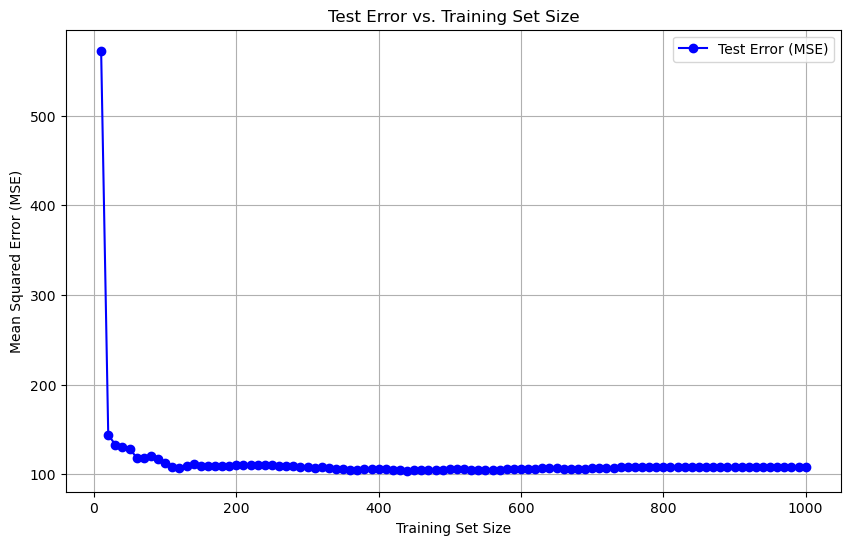

In [222]:
# Plot the test errors
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_errors, marker='o', linestyle='-', color='b', label='Test Error (MSE)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Error vs. Training Set Size')
plt.legend()
plt.grid()
plt.show()

### 3. Implement batch gradient descent and stochastic gradient descent to solve this problem. Report the train and test error in each case. 

#### Batch Gradient Descent Implementation

In [250]:
def batch_gradient_descent(X, y, alpha=0.01, num_iterations=1500):
    m, n = X.shape
    theta = np.zeros(n)
    costs = {'Train_loss':[], 'Test_loss':[]}

    for _ in range(num_iterations):
        # print(X.shape)
        # print(theta.shape)
        predictions = X @ theta
        error = predictions - y
        gradient = (X.T @ error) / m
        # print(gradient.shape)
        theta -= alpha * gradient
        # theta = theta.reshape(-1, 1)
        # costs.append(np.mean(error ** 2) / 2)
        costs['Train_loss'].append(compute_MSE(X @ theta, y))
        costs['Test_loss'].append(compute_MSE(X_test_scaled @ theta, y_test_log))
    
    return theta, costs


#### Stochastic Gradient Descent Implementation

In [251]:
def stochastic_gradient_descent(X, y, alpha=0.01, num_epochs=1500):
    m, n = X.shape
    theta = np.zeros(n)
    costs = {'Train_loss':[], 'Test_loss':[]}

    for _ in range(num_epochs):
        indices = np.random.permutation(m)
        for i in indices:
            xi = X[i:i+1]
            yi = y[i:i+1]
            error = (xi @ theta) - yi
            gradient = xi.T @ error
            theta -= alpha * gradient
        costs['Train_loss'].append(compute_MSE(X @ theta, y))
        costs['Test_loss'].append(compute_MSE(X_test_scaled @ theta, y_test_log))

    return theta, costs


#### Train and Evaluate the Models

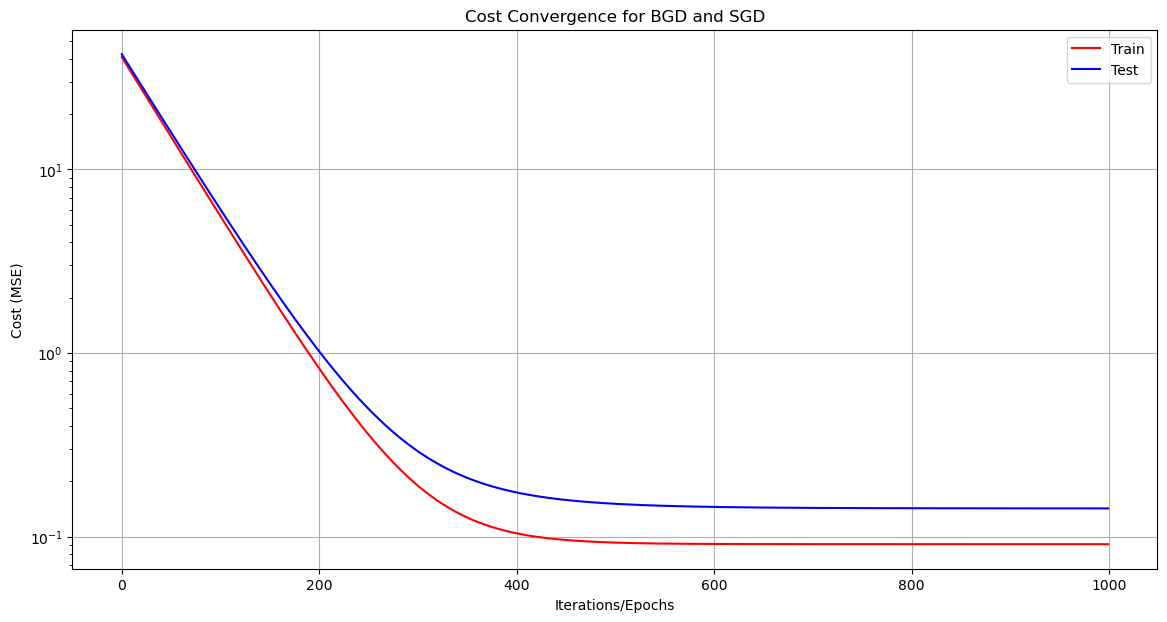

In [249]:
# Initialize a dictionary to store results for both BGD and SGD
results = {'BGD': {}, 'SGD': {}}
learning_rates = [0.01]

for lr in learning_rates:
    # Batch Gradient Descent
    bgd_theta, bgd_costs = batch_gradient_descent(X_train_scaled, y_train_log, alpha=lr)

    # Stochastic Gradient Descent
    # sgd_theta, sgd_costs = stochastic_gradient_descent(X_train_scaled, y_train_log, alpha=lr)

# Plot cost convergence for all learning rates
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(bgd_costs['Train_loss'])), bgd_costs['Train_loss'], label='Train', color='red')
plt.plot(np.arange(len(bgd_costs['Train_loss'])), bgd_costs['Test_loss'], label='Test',color='blue')

plt.xlabel('Iterations/Epochs')
plt.ylabel('Cost (MSE)')
plt.yscale('log')
plt.title('Cost Convergence for BGD and SGD')
plt.legend()
plt.grid()
plt.show()

# # Print results
# for method in results.keys():
#     print(f"\n=== {method} Results ===")
#     for lr, metrics in results[method].items():
#         print(f"\nLearning Rate: {lr}")
#         print(f"  Train MSE: {metrics['Train MSE']:.4f}")
#         print(f"  Test MSE: {metrics['Test MSE']:.4f}")
#         print(f"  Train MAE: {metrics['Train MAE']:.4f}")
#         print(f"  Test MAE: {metrics['Test MAE']:.4f}")
#         print(f"  Train R2: {metrics['Train R2']:.4f}")
#         print(f"  Test R2: {metrics['Test R2']:.4f}")


In [254]:
from tqdm import tqdm

In [255]:
     # index 0 of each tuple is train loss and index 1 of each tuple is test loss
results = {'sgd':[], 'bgd':[]}   
for data_size in tqdm(range(10, 1001, 10)):
    X_train_s = X_train_scaled[:data_size]
    y_train_s = y_train_log[:data_size]
    bgd_theta, bgd_costs = batch_gradient_descent(X_train_s, y_train_s, alpha=1e-2)    
    sgd_theta, sgd_costs = stochastic_gradient_descent(X_train_s, y_train_s, alpha=1e-2)
    
    results['bgd'].append((np.mean(bgd_costs['Train_loss']), np.mean(bgd_costs['Test_loss'])))
    results['sgd'].append((np.mean(sgd_costs['Train_loss']), np.mean(sgd_costs['Test_loss'])))    

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [19:18<00:00, 11.59s/it]


In [259]:
results.keys()

dict_keys(['sgd', 'bgd'])

In [261]:
len([met[1] for met in results['bgd']])

100

In [262]:
len(results['bgd'])

100

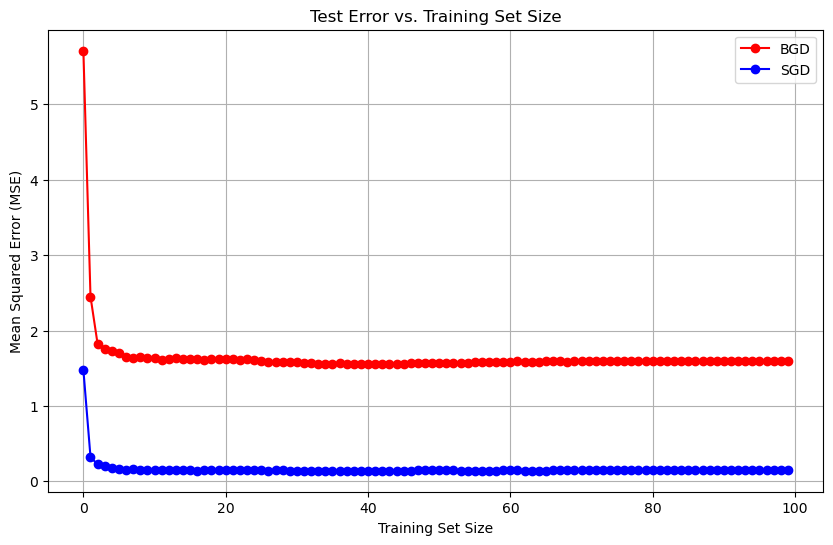

In [263]:
# Plot the test errors
plt.figure(figsize=(10, 6))
plt.plot(range(len(results['bgd'])), [met[1] for met in results['bgd']], marker='o', linestyle='-', color='red', label='BGD')
plt.plot(range(len(results['bgd'])), [met[1] for met in results['sgd']], marker='o', linestyle='-', color='blue', label='SGD')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Error vs. Training Set Size')
plt.legend()
plt.grid()
plt.show()

### 4. Now, add a L2 regulator to the cost function and solve the problem using closed-form. Specify the best value for regularizer parameter (ƛ)between 10-4 , 10-3 , ..., 1, ..., 10 3, 104 . Plot both train and test errors concerning the logarithmic amount of ƛ. 

In [264]:
def closed_form_solution_l2(x, y, lambd):
    m, n = x.shape
    I = np.eye(n)  # Identity matrix
    I[0, 0] = 0  # Exclude bias term from regularization (if present)
    XTX = x.T @ x
    XTy = x.T @ y
    theta = np.linalg.inv(XTX + lambd * I) @ XTy  # Regularized normal equation
    return theta

In [273]:
# List of lambda values (logarithmic scale)
lambdas = np.logspace(-4, 4, num=9)
train_errors = []
test_errors = []

for lambd in lambdas:
    # Compute optimal theta
    theta_l2 = closed_form_solution_l2(X_train_scaled, y_train_log, lambd)

    # Predictions (train and test)
    y_train_pred = X_train_scaled @ theta_l2
    y_test_pred = X_test_scaled @ theta_l2

    # Compute MSE for train and test sets
    train_error = compute_MSE(y_train_log, y_train_pred)
    test_error = compute_MSE(y_test_log, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

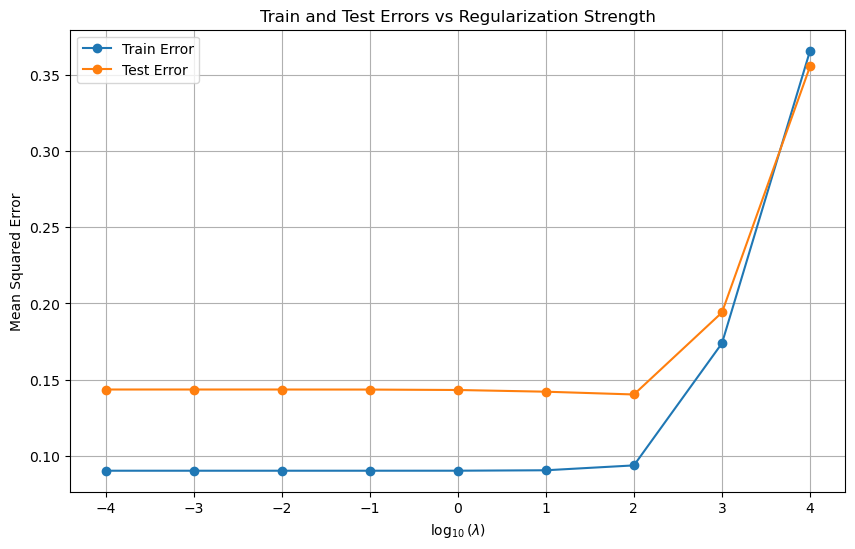

In [274]:
# Plot Train vs Test Errors
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambdas), train_errors, label='Train Error', marker='o')
plt.plot(np.log10(lambdas), test_errors, label='Test Error', marker='o')
plt.xlabel(r'$\log_{10}(\lambda)$')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs Regularization Strength')
plt.legend()
plt.grid()
plt.show()

### 5. compare the results with and without regularization. 

#### Compute Results Without Regularization

In [284]:
# Without Regularization
theta_no_reg = closed_form_solution(X_train_scaled, y_train_log)

# Predictions
y_train_pred_no_reg = X_train_scaled @ theta_no_reg
y_test_pred_no_reg = X_test_scaled @ theta_no_reg

# Errors
train_error_no_reg = compute_MSE(y_train_log, y_train_pred_no_reg)
test_error_no_reg = compute_MSE(y_test_log, y_test_pred_no_reg)

#### Find Best λ for Regularization

In [281]:
# Identify best lambda based on test error
best_lambda_index = np.argmin(test_errors)
best_lambda = lambdas[best_lambda_index]

# Compute theta with best regularization
theta_best_reg = closed_form_solution_l2(X_train_scaled, y_train_log, best_lambda)

# Predictions
y_train_pred_reg = X_train_scaled @ theta_best_reg
y_test_pred_reg = X_test_scaled @ theta_best_reg

# Errors
train_error_reg = compute_MSE(y_train_log, y_train_pred_reg)
test_error_reg = compute_MSE(y_test_log, y_test_pred_reg)

#### Visualize and Tabulate Results

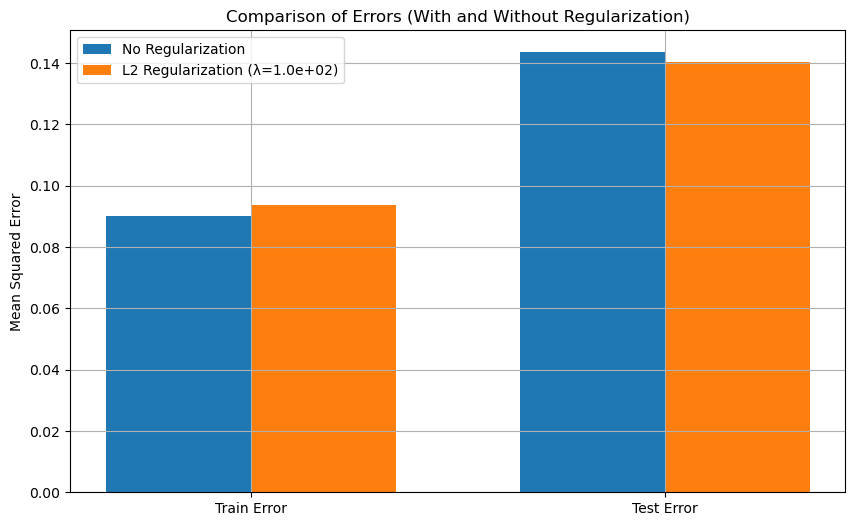

Without Regularization: Train Error = 0.0902, Test Error = 0.1435
With Regularization (λ=1.0e+02): Train Error = 0.0937, Test Error = 0.1402


In [285]:
# Plot Errors for Comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
x_labels = ['Train Error', 'Test Error']

# Without Regularization
plt.bar(np.arange(len(x_labels)), 
        [train_error_no_reg, test_error_no_reg], 
        width=bar_width, label='No Regularization')

# With Regularization
plt.bar(np.arange(len(x_labels)) + bar_width, 
        [train_error_reg, test_error_reg], 
        width=bar_width, label=f'L2 Regularization (λ={best_lambda:.1e})')

plt.xticks(np.arange(len(x_labels)) + bar_width / 2, x_labels)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Errors (With and Without Regularization)')
plt.legend()
plt.grid()
plt.show()

# Print Errors for Comparison
print(f"Without Regularization: Train Error = {train_error_no_reg:.4f}, Test Error = {test_error_no_reg:.4f}")
print(f"With Regularization (λ={best_lambda:.1e}): Train Error = {train_error_reg:.4f}, Test Error = {test_error_reg:.4f}")